## 1.DATA GATHERING

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Data Cleaning

In [15]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")

# 1) Inspect to diagnose quickly
print("DF shape:", getattr(df, "shape", "df not defined"))
print("Columns:", list(df.columns))
print(df.head())

# 2) Replace empty/whitespace-only strings with actual missing values
df = df.replace(r'^\s*$', pd.NA, regex=True)

# 3) Show missing counts
print("Missing values before:", df.isnull().sum())

# 4) Fill director safely (only if column exists)
if 'director' in df.columns:
    # replace common 'nan' strings that can appear as text
    df['director'] = df['director'].replace(['nan', 'NaN', 'None'], pd.NA)
    df['director'] = df['director'].fillna('Unknown')
else:
    print("Warning: 'director' column not found. Available columns:", list(df.columns))

# 5) Drop rows missing title (only if title exists)
if 'title' in df.columns:
    df = df.dropna(subset=['title'])
else:
    print("Warning: 'title' column not found. Skipping dropna on title.")

# 6) Remove duplicates (reassign to avoid SettingWithCopyWarning)
df = df.drop_duplicates()

# 7) Convert date_added to datetime robustly
if 'date_added' in df.columns:
    # strip whitespace, cast to str (protects against non-string types)
    df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(),
                                      errors='coerce', dayfirst=False)
    # report parse results
    parsed = df['date_added'].notna().sum()
    total = len(df)
    print(f"Parsed date_added: {parsed}/{total} rows (others are NaT)")
    # show some raw unparsable samples (if any)
    bad = df[pd.to_datetime(df['date_added'].astype(str), errors='coerce').isna() & df['date_added'].notna()]['date_added'].unique()
    if len(bad):
        print("Examples of unparsable date_added values (raw):", bad[:10])
else:
    print("Warning: 'date_added' column not found.")


DF shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release

## 3. Data Transformation
# Normalization using Database Normal Forms

In [26]:

#  Split cast into multiple rows
df_cast = df.assign(actor=df['cast'].str.split(', ')).explode('actor')
df_cast


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [30]:
#  Split genres into multiple rows
df_genre = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
df_genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


# Categorical Data Creation

In [35]:
# Create categorical column for type
df['type'] = df['type'].astype('category').cat.codes

# Convert country into categorical codes
df['country_cat'] = df['country'].astype('category').cat.codes


# 4. Data Integration (Joins)

In [38]:
# Merge genre table with original
df_merged = df.merge(df_genre[['show_id','genre']], on="show_id", how="left")
df_merged

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_cat,genre
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",603,Documentaries
1,s2,1,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",426,International TV Shows
2,s2,1,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",426,TV Dramas
3,s2,1,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",426,TV Mysteries
4,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,-1,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19318,s8806,0,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",603,Children & Family Movies
19319,s8806,0,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",603,Comedies
19320,s8807,0,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,251,Dramas
19321,s8807,0,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,251,International Movies


# 5. Data Reduction (PCA)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric columns
num_df = df[['type','country_cat']].fillna(0)

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(num_df)

# PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

df_pca = pd.DataFrame(reduced, columns=['PC1','PC2'])
df_pca.head()


,PC1,PC2
0,1.154977,0.220664
1,-0.944878,1.195732
2,-2.301614,-0.161004
3,-2.301614,-0.161004
4,-1.500918,0.639693


# 6. Data Visualization

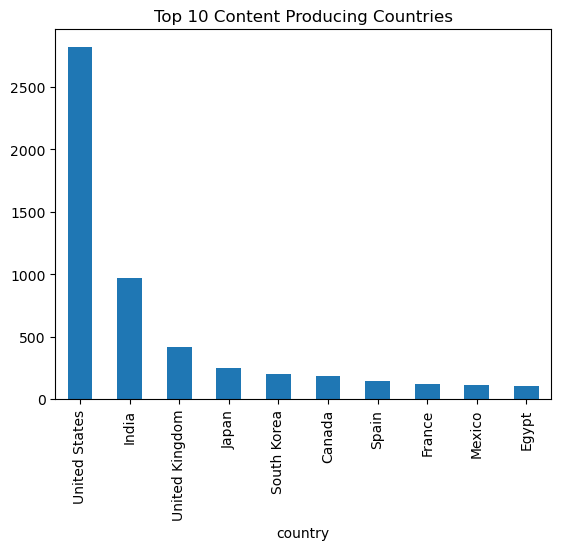

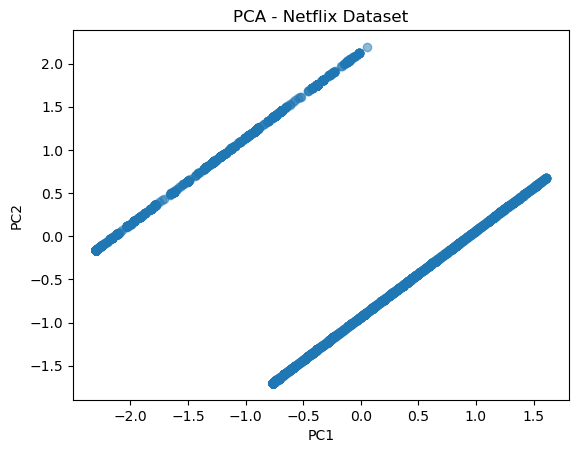

In [46]:
import matplotlib.pyplot as plt

# Country distribution
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.show()

# PCA Scatter
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title("PCA - Netflix Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
